In [ ]:
!pip install stanza indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [ ]:
import stanza
import pandas as pd
from indicnlp.tokenize import indic_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download Telugu model for Stanza (if not already downloaded)
stanza.download('te', processors='tokenize,pos')

# Initialize the Telugu NLP pipeline
nlp = stanza.Pipeline('te', processors='tokenize,pos', use_gpu=False)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: te (Telugu)...
| Processor       | Package      |
----------------------------------
| tokenize        | mtg          |
| pos             | mtg_charlm   |
| backward_charlm | oscar2022    |
| forward_charlm  | oscar2022    |
| pretrain        | fasttextwiki |



INFO:stanza:Downloaded file to /root/stanza_resources/te/tokenize/mtg.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/pos/mtg_charlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/backward_charlm/oscar2022.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/forward_charlm/oscar2022.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/pretrain/fasttextwiki.pt
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: te (Telugu):
| Processor | Package    |
--------------------------
| tokenize  | mtg        |
| pos       | mtg_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user

In [ ]:
# Load the dataset
file_path = '/content/dataset(nlp).csv'
df = pd.read_csv(file_path)

# Fill missing data if any
df['Verse'] = df['Verse'].fillna('')

# Get the number of rows
print(df.shape[0])

df.head()

1000


,Verseid,Verse
0,1,ఆదియందు దేవుడు భూమ్యాకాశములను సృజించెను.
1,2,భూమి నిరాకారముగాను శూన్యముగాను ఉండెను; చీకటి అ...
2,3,దేవుడు వెలుగు కమ్మని పలుకగా వెలుగు కలిగెను.
3,4,వెలుగు మంచిదైనట్టు దేవుడుచూచెను; దేవుడు వెలుగు...
4,5,"దేవుడు వెలుగునకు పగలనియు, చీకటికి రాత్రి అనియు..."


In [ ]:
# Tokenization and POS tagging using Stanza
def stanza_pos_tagging(verse):
    doc = nlp(verse)
    tokens_and_tags = [(word.text, word.pos) for sentence in doc.sentences for word in sentence.words]
    return tokens_and_tags

In [ ]:
# Apply POS tagging to each verse
df['POS_Tags'] = df['Verse'].apply(stanza_pos_tagging)


In [ ]:
# Convert the DataFrame into a format with one word per row and corresponding POS tag
formatted_data = []
for _, row in df.iterrows():
    for word, pos in row['POS_Tags']:
        formatted_data.append({'Word': word, 'POS_Tag': pos})

In [ ]:
# Create a new DataFrame for the formatted data
formatted_df = pd.DataFrame(formatted_data)

<ipython-input-52-e3c29c2797bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with 

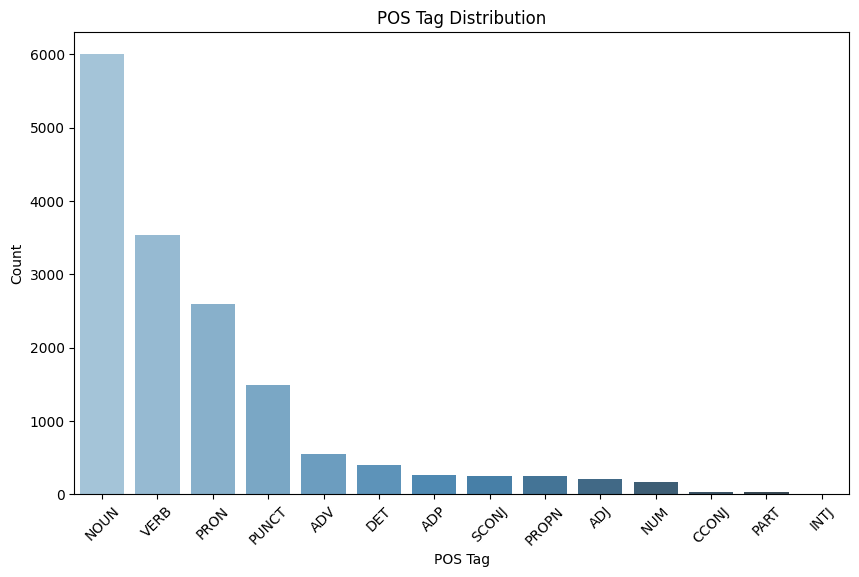

In [ ]:
plt.figure(figsize=(10, 6))
pos_counts = formatted_df['POS_Tag'].value_counts()
sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Blues_d')
plt.title('POS Tag Distribution')
plt.ylabel('Count')
plt.xlabel('POS Tag')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Adding a column for Spell Checking (this is a placeholder function for now)
# You can replace this with a real spell-checking function using Indic NLP or any other method
def spell_check(word):
    # A very basic spell check (replace with a real spell checker or a word list)
    if len(word) > 0:  # Example condition, can be any spell check logic
        return "Correct"
    else:
        return "Incorrect"

In [ ]:
# Example usage
word = 'వ్రాయబడిం'
result = spell_check(word)
print(f"The word '{word}' is {result}.")

The word 'వ్రాయబడిం' is Correct.


In [ ]:
# # Apply spell checking
formatted_df['Spell_Check'] = formatted_df['Word'].apply(spell_check)

In [ ]:
# Save the formatted data to a CSV file
output_file_path = 'path_to_save_output.csv'
formatted_df.to_csv(output_file_path, index=False)

In [ ]:
print(f"Formatted dataset saved to {output_file_path}")

Formatted dataset saved to path_to_save_output.csv


In [ ]:
# Print out the first few rows of the DataFrame to verify

formatted_df.columns
formatted_df.head(20)

,Word,POS_Tag,Spell_Check
0,ఆదియందు,NOUN,Correct
1,దేవుడు,NOUN,Correct
2,భూమ్యాకాశములను,NOUN,Correct
3,సృజించెను,VERB,Correct
4,.,PUNCT,Correct
5,భూమి,NOUN,Correct
6,నిరాకారముగాను,NOUN,Correct
7,శూన్యముగాను,NOUN,Correct
8,ఉండెను;,VERB,Correct
9,చీకటి,NOUN,Correct


In [ ]:
import pandas as pd
import difflib

# Load the dataset from the CSV file
file_path = 'path_to_save_output.csv'  # Update this with the actual file path in your colab
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Word,POS_Tag,Spell_Check
0,ఆదియందు,NOUN,Correct
1,దేవుడు,NOUN,Correct
2,భూమ్యాకాశములను,NOUN,Correct
3,సృజించెను,VERB,Correct
4,.,PUNCT,Correct


In [ ]:
# Group by sentences (use punctuation to split sentences)
def group_sentences(df):
    sentences = []
    current_sentence = []
    for idx, row in df.iterrows():
        current_sentence.append((row['Word'], row['POS_Tag'], row['Spell_Check']))
        if row['Word'] in ['.', '!', '?']:  # End of sentence
            sentences.append(current_sentence)
            current_sentence = []
    if current_sentence:  # Append any remaining sentence
        sentences.append(current_sentence)
    return sentences

In [ ]:
# Get sentence-wise data
sentences = group_sentences(df)

# Display the structure of one sentence for reference
for sentence in sentences[:1]:  # Show first sentence
    print(sentence)

[('ఆదియందు', 'NOUN', 'Correct'), ('దేవుడు', 'NOUN', 'Correct'), ('భూమ్యాకాశములను', 'NOUN', 'Correct'), ('సృజించెను', 'VERB', 'Correct'), ('.', 'PUNCT', 'Correct')]


In [ ]:
# Function to correct misspelled words in each sentence
def spellcheck_sentence(sentence, correct_words):
    corrected_sentence = []
    for word, pos, spell in sentence:
        # Apply correction only if the word is incorrect
        if spell == 'Incorrect':
            corrected_word = difflib.get_close_matches(word, correct_words, n=1)
            corrected_word = corrected_word[0] if corrected_word else word
        else:
            corrected_word = word
        corrected_sentence.append((corrected_word, pos))
    return corrected_sentence


In [ ]:
# List of correct words from the dataset
correct_words = df[df['Spell_Check'] == 'Correct']['Word'].unique().tolist()

# Apply spellcheck to each sentence
corrected_sentences = [spellcheck_sentence(sentence, correct_words) for sentence in sentences]

In [ ]:
# Placeholder for a function to tag POS for corrected sentences
# Assuming you have a trained POS model or using a simple tagger (replace with actual model if needed)
def pos_tag_sentence(corrected_sentence):
    # Dummy POS tagging logic (replace with actual model predictions)
    return [(word, pos) for word, pos in corrected_sentence]

# Apply POS tagging to each corrected sentence
pos_tagged_sentences = [pos_tag_sentence(sentence) for sentence in corrected_sentences]

In [ ]:
# Function to print sentence-wise results
def display_results(original_sentences, corrected_sentences, pos_tagged_sentences):
    for i, sentence in enumerate(original_sentences[:5]):  # Display first 5 sentences
        original_sentence = " ".join([w[0] for w in sentence if w[0] not in ['.', '!', '?']]) + sentence[-1][0]
        corrected_sentence = " ".join([w[0] for w in corrected_sentences[i] if w[0] not in ['.', '!', '?']]) + corrected_sentences[i][-1][0]
        pos_tagged_output = [(w[0], w[1]) for w in pos_tagged_sentences[i] if w[0] not in ['.', '!', '?']]

        print(f"Original Verse {i+1}: {original_sentence}")
        print(f"Spellchecked Output {i+1}: {corrected_sentence}")
        print(f"POS Tagged Output {i+1}: {pos_tagged_output}\n")

# Display results for the first 5 sentences
display_results(sentences, corrected_sentences, pos_tagged_sentences)

Original Verse 1: ఆదియందు దేవుడు భూమ్యాకాశములను సృజించెను.
Spellchecked Output 1: ఆదియందు దేవుడు భూమ్యాకాశములను సృజించెను.
POS Tagged Output 1: [('ఆదియందు', 'NOUN'), ('దేవుడు', 'NOUN'), ('భూమ్యాకాశములను', 'NOUN'), ('సృజించెను', 'VERB')]

Original Verse 2: భూమి నిరాకారముగాను శూన్యముగాను ఉండెను; చీకటి అగాధ జలము పైన కమ్మియుండెను; దేవుని ఆత్మ జలములపైన అల్లాడుచుండెను.
Spellchecked Output 2: భూమి నిరాకారముగాను శూన్యముగాను ఉండెను; చీకటి అగాధ జలము పైన కమ్మియుండెను; దేవుని ఆత్మ జలములపైన అల్లాడుచుండెను.
POS Tagged Output 2: [('భూమి', 'NOUN'), ('నిరాకారముగాను', 'NOUN'), ('శూన్యముగాను', 'NOUN'), ('ఉండెను;', 'VERB'), ('చీకటి', 'NOUN'), ('అగాధ', 'ADJ'), ('జలము', 'NOUN'), ('పైన', 'ADP'), ('కమ్మియుండెను;', 'VERB'), ('దేవుని', 'NOUN'), ('ఆత్మ', 'NOUN'), ('జలములపైన', 'NOUN'), ('అల్లాడుచుండెను', 'VERB')]

Original Verse 3: దేవుడు వెలుగు కమ్మని పలుకగా వెలుగు కలిగెను.
Spellchecked Output 3: దేవుడు వెలుగు కమ్మని పలుకగా వెలుగు కలిగెను.
POS Tagged Output 3: [('దేవుడు', 'NOUN'), ('వెలుగు', 'NOUN'), ('కమ్మని', 